This dataset includes 5 sets of annotated tweets from 5 different stories: 

airfrance.txt:	Air France mid-air crash photos?

michelle.txt:	Michelle Obama hired too many staff?

palin.txt:	palin Sarah Palin getting divorced?

cell-ids.txt:	Cell phone numbers going public?

obama-ids.txt:	Is Barack Obama muslim? 


Each tweet in each dataset is annotated usign the following guidelines:

0 -> if the tweet is not about the rumor

11 -> if the tweet endorses the rumor

12 -> if the tweet denies the rumor

13 -> if the tweet questions the rumor

14 -> if the tweet is neutral

2 -> if the annotator is undetermined


Three of the datasets (airfrance.txt, michelle.txt, and palin.txt) have 4 columns with the following format:

date userid tweet label

The other 2, (obama-ids.txt and cell-ids.txt) have 2 columns with the following format:

tweet id label


Please cite this paper when you use this data:

@InProceedings{qazvinian-EtAl:2011:EMNLP,
  author    = {Qazvinian, Vahed  and  Rosengren, Emily  and  Radev, Dragomir R.  and  Mei, Qiaozhu},
  title     = {Rumor has it: Identifying Misinformation in Microblogs},
  booktitle = {Proceedings of the 2011 Conference on Empirical Methods in Natural Language Processing},
  month     = {July},
  year      = {2011},
  address   = {Edinburgh, Scotland, UK.},
  publisher = {Association for Computational Linguistics},
  pages     = {1589--1599},
}



# Analisi date

In [3]:
import pymongo
import codecs
import dateutil

client=pymongo.MongoClient()#senza parametri si connette a localhost.

client.list_database_names()

db=client['inforet']#prendo il db, se non c'è lo crea

col = db['rumors_raw']

In [4]:
dates = {
    'obama':[],
    'michelle':[],
    'cell':[],
    'palin':[],
    'airfrance':[]
}
for tweet in col.find():
    dates[tweet['rumor']].append(tweet['date'].date()) 

In [5]:
from collections import Counter
c = Counter

c_dates= {
    'obama':[],
    'michelle':[],
    'cell':[],
    'palin':[],
    'airfrance':[]
}

from collections import OrderedDict
import datetime

for rumor in dates.keys():
    
    odct = OrderedDict()
    for item in dates[rumor]:
        try:
            odct[item] += 1
        except KeyError:
            odct[item] = 1
            
    c_dates[rumor] = odct

#print [(item, dates['cell'].count(item)) for item in list(OrderedDict.fromkeys(dates['cell']))]

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates
%matplotlib inline

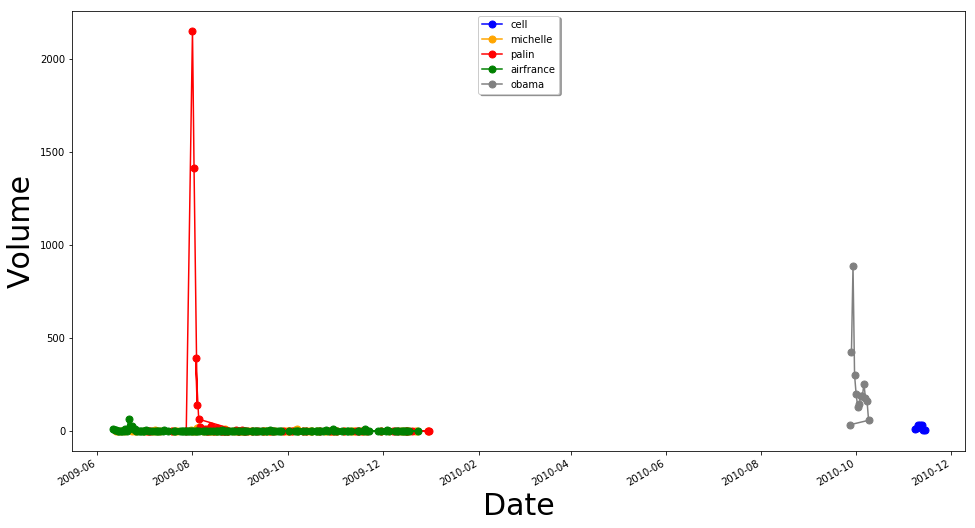

In [8]:
fig = plt.figure(figsize=(16,9)) #è la dimensione del grafico
assi = fig.gca()
colors = ['blue','orange','red','green','gray']
for i,rumor in enumerate(c_dates.keys()):
    assi.plot([d for d in c_dates[rumor].keys()],[v for v in c_dates[rumor].values() ],color=colors[i],marker='o',linestyle='-', ms = 7, label= rumor)

assi.set_xlabel('Date',size=30)
assi.set_ylabel('Volume',size=30)
legend = assi.legend(loc='upper center', shadow=True)
plt.gcf().autofmt_xdate()
#fig.savefig('pdf.png', dpi=300)

In [9]:
del c_dates['obama']
del c_dates['cell']

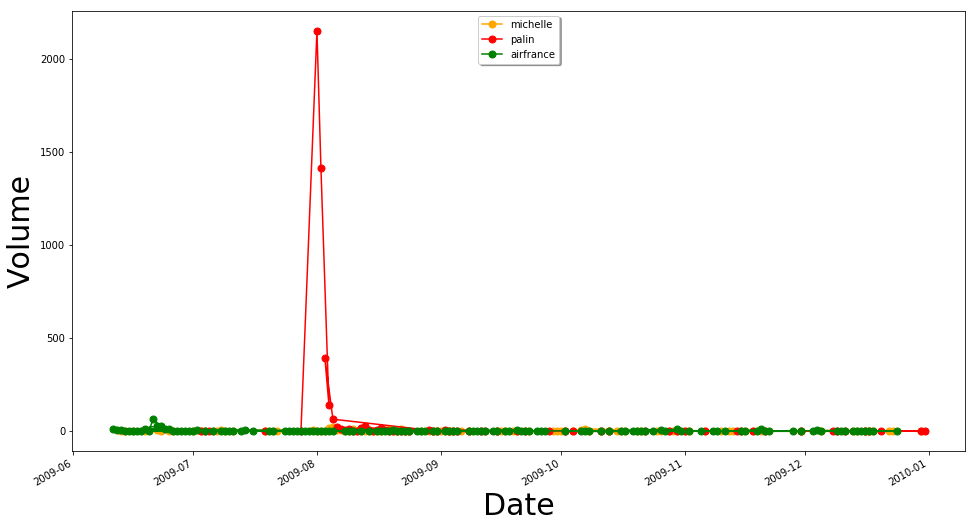

In [10]:
fig = plt.figure(figsize=(16,9)) #è la dimensione del grafico
assi = fig.gca()
colors = ['orange','red','green']
for i,rumor in enumerate(c_dates.keys()):
    assi.plot([d for d in c_dates[rumor].keys()],[v for v in c_dates[rumor].values() ],color=colors[i],marker='o',linestyle='-', ms = 7, label= rumor)

assi.set_xlabel('Date',size=30)
assi.set_ylabel('Volume',size=30)
legend = assi.legend(loc='upper center', shadow=True)
plt.gcf().autofmt_xdate()
#fig.savefig('pdf.png', dpi=300)